# Описание проекта

Заказчик — интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й.

### Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sb
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [46]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unrated,31.38


### Подготовка данных

#### Замена названий столбцов

In [4]:
data.columns = data.columns.str.lower()
data.columns

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Было принято решение привести все названия столбцов к нижнему регистру. 

#### Преобразование типов данных

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Так как год представляет собой целое число, было принято решение изменить формат с `float64` на `Int64`.

In [6]:
print(data['critic_score'].sort_values().unique())

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


Визуальная проверка значений столбца на целочисленность.

In [7]:
data['critic_score'] = data['critic_score'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


Здесь представлена целочисленная система оценки, так что вновь преобразовали формат данных в `Int64`.

In [8]:
print(data['user_score'].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


Визуальная проверка значений столбца на целочисленность показала, что в значениях изучаемого столбца есть `tbd`, означающее, что оценка еще не определена.   
Преобразуем эти значения в `nan`.

In [9]:
data = data.replace('tbd',np.NaN)
data['user_score'] = data['user_score'].astype('float64')
print(data['user_score'].sort_values().unique())

[0.  0.2 0.3 0.5 0.6 0.7 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.
 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6
 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4
 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2
 9.3 9.4 9.5 9.6 9.7 nan]


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


#### Обработка пропусков

In [11]:
display(data.loc[data['name'].isna() == True])
data = (data.loc[data['name'].isna() == False]).reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


2 строки в этом датафрейме имеют слишком мало данных, поэтому удалим их для увеличения степени объективности последующих исследований.

In [12]:
data['year_of_release'] = data['year_of_release'].fillna(data[data['platform'] != 'PC'].groupby('platform')['year_of_release'].transform('median'))

Также мы частично заполнили пропуски `year_of_release`, все строки были заполнены медианой в зависимости от платформы (логика таких действий заключается в том, что платформы часто сменяют друг друга, из-за чего разброс в годах не такой большой; исключением стал `PC`, так как эта платформа существует долгие годы, поэтому брать медиану по этим строкам было бы ошибкой).

In [13]:
data['rating'] = data['rating'].fillna('Unrated')

Заполним пропуски в столбце рейтинг значением `Unrated`. Подозреваем, что отсутствие рейтинга связано с тем, что его ещё не определили, либо продукт не был оценен агенством ESRB.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16696 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Заполнять пропуски в последних трёх столбцах было бы необъективно, так как это оценочные данные, они всегда субъективны.
В итоге получили такой `data.info()`.

#### Добавление нового столбца продаж

In [15]:
data['ttl_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unrated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,Unrated,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,Unrated,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,Unrated,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,Unrated,0.01


Успешно добавили столбец `ttl_sales`, показывающий продажи во всех регионах.

### Исследовательский анализ данных

#### Выпуск игр в разные годы

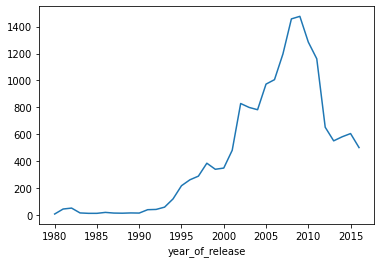

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1285
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

In [16]:
data.groupby('year_of_release')['name'].count().plot.line(x = 'year_of_release', y = 'count');
plt.show()
data.groupby('year_of_release')['name'].count()

Судя по графику видно, что "золотой век" гейм-девелопа пришёлся на период с 2005 по 2011 годы.     
Рынок с каждым годом меняется, поэтому для планирования кампании на 2017-ый год нам точно не понадобятся устаревшие с этой точки зрения данные.

#### Как менялись продажи по платформам

In [17]:
top10_platforms = data.groupby('platform')['ttl_sales'].sum().sort_values(ascending=False).head(10)
print(top10_platforms)
top10_platforms_list = list(top10_platforms.index)
top10_platforms_list

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: ttl_sales, dtype: float64


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

Мы получили список 10 платформ с наибольшими суммарными продажами.

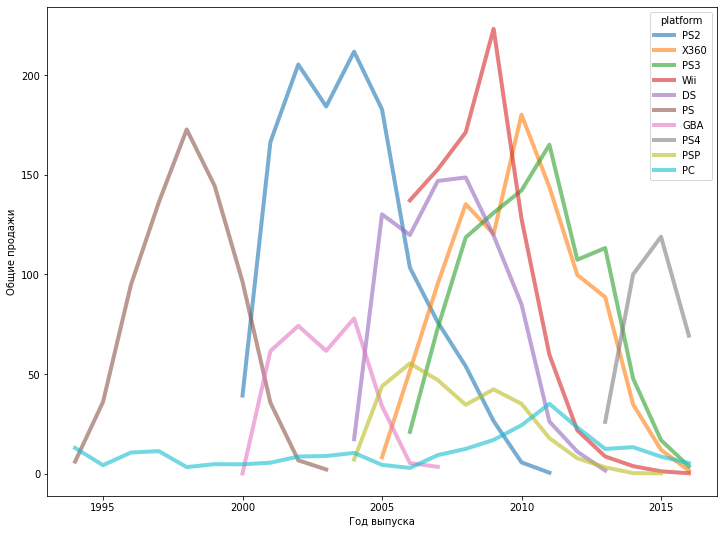

In [49]:
platform_sales_t = data.pivot_table(index='year_of_release', values='ttl_sales', columns = 'platform', aggfunc='sum')
platform_sales_top10_t = platform_sales_t[top10_platforms_list]
platform_sales_top10_t.plot(figsize=(12, 9), linewidth=4.0, alpha=0.6, xlim=(1993, 2017));
plt.ylabel('Общие продажи')
plt.xlabel('Год выпуска')
plt.title('Общий объем продаж по годам для 10 крупнейших платформ')
plt.show()

А также график, иллюстрирующий эту выборку.

По графику можно заметить, что "цикл жизни" платформы составляет около 5-10 лет (за исключением ПК).

В итоге, актуальным периодом для построения прогноза на 2017 год мы решили считать 2014 - 2016 годы. 

In [19]:
actual_data = data.loc[data.year_of_release >= 2014]

In [20]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,Unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,Unrated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,Unrated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,Unrated,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,Unrated,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,Unrated,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,Unrated,0.01


In [21]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1690 non-null   object 
 1   platform         1690 non-null   object 
 2   year_of_release  1690 non-null   Int64  
 3   genre            1690 non-null   object 
 4   na_sales         1690 non-null   float64
 5   eu_sales         1690 non-null   float64
 6   jp_sales         1690 non-null   float64
 7   other_sales      1690 non-null   float64
 8   critic_score     719 non-null    Int64  
 9   user_score       889 non-null    float64
 10  rating           1690 non-null   object 
 11  ttl_sales        1690 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.9+ KB


Получили такой датафрейм.

#### Поиск потенциально прибыльных платформ

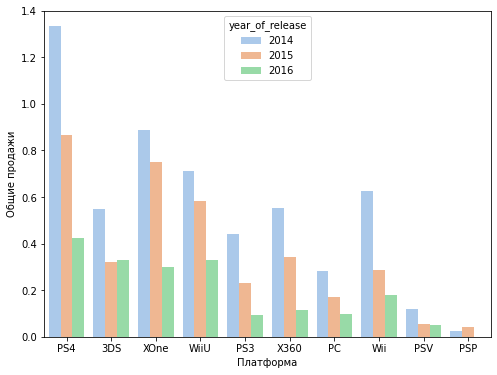

In [22]:
fig, ax = plt.subplots(figsize=(8, 6)) # установим размер графика через subplot
sb.barplot(data=actual_data, x='platform', hue='year_of_release', y='ttl_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Платформа', ylabel='Общие продажи') # имена для осей
plt.show()

По графику видно, что топ-3 по общим продажам занимают: PS4, XOne и WiiU. Среди всех платформ выделяется 3DS, которая единственная показала рост в 2016 году относительно 2015 года, так что можно причислить эту платформу к потенциально прибыльным. В этот же список войдут и платформы из ранее названного топ-3, потому что такие высокие продажи точно поспособствуют получению прибыли.

#### "Ящик с усами" по глобальным продажам игр в разбивке по платформам

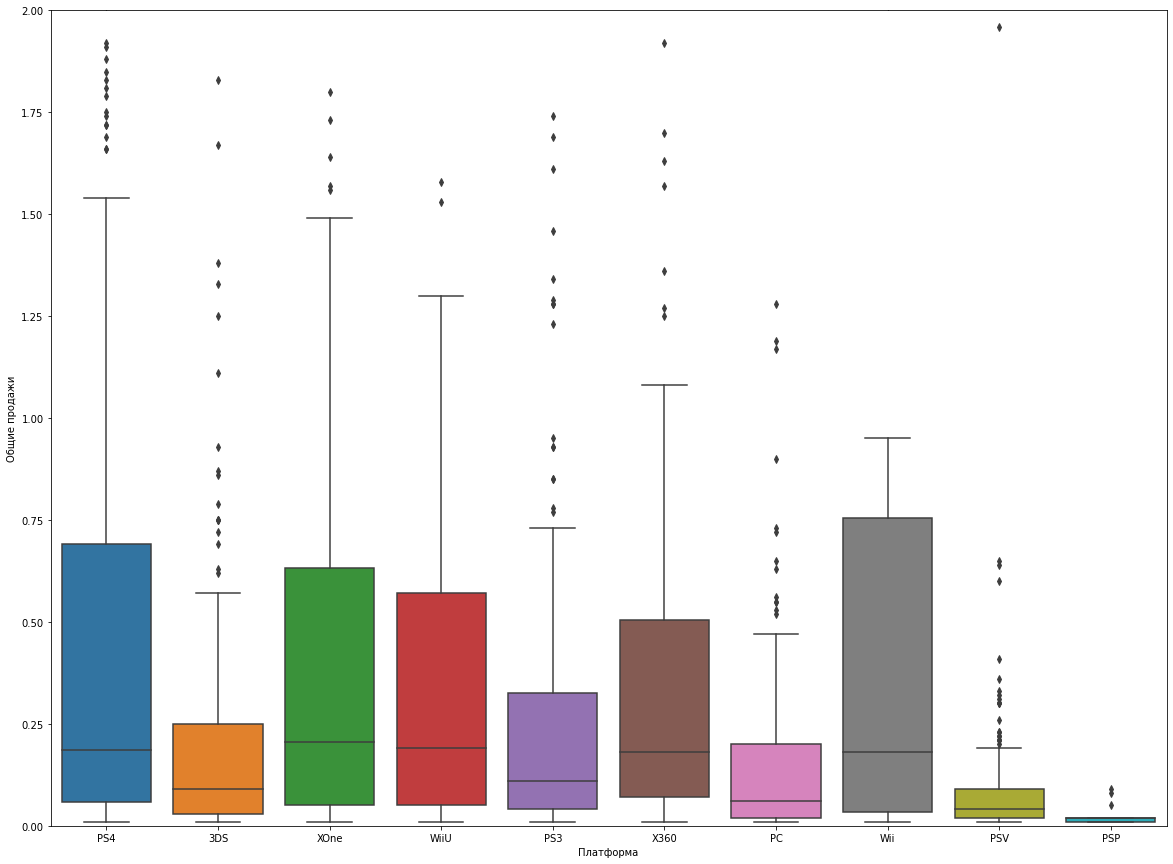

In [23]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_ylim([0, 2])
sb.boxplot(data=actual_data, y = 'ttl_sales', x='platform', ax=ax);
ax.set(xlabel='Платформа', ylabel='Общие продажи')
plt.show()

На графиках видно, что высота у некоторых боксплотов заметно отличается, это может говорить нам о количестве разноплановых проектов на этих платформах. Например, на Wii проект может как принести большое количество продаж, так и малое, когда как на PС и PSV игры не так сильно "выстреливают".    
Можно заметить, что медиана на всех графиках горазда меньше среднего, что говорит о том, что большинство проектов всё же являются "проходными" либо же нишевыми.

####  Влияние отзывов пользователей и критиков на продажи

Возьмём в качестве примера PS4 как самую популярную платформу. 


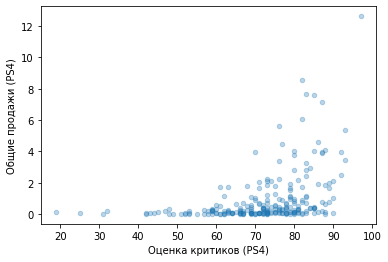

Коэффициент корреляции равен:


0.40266141068104083

In [24]:
actual_data[actual_data['platform'] == 'PS4'].plot(y='ttl_sales', x='critic_score', kind='scatter', alpha=0.3);
plt.ylabel('Общие продажи (PS4)')
plt.xlabel('Оценка критиков (PS4)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'PS4']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'PS4']['critic_score'].astype('float64')) #приводим к типу float64, так как с int64 корреляция дружить не хочет

По графику, а также по полученным значениям, видно, что корреляция, хоть и слабая, имеет место быть. Это имеет смысл, так как критики получают игру раньше, до обычных игроков. Выставляя высокие оценки, они побуждают игроков делать предзаказы или покупать игру на релизе.

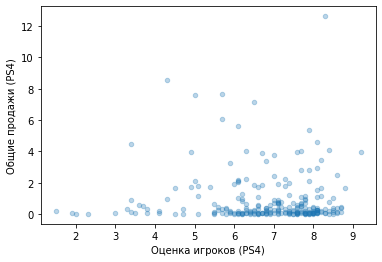

Коэффициент корреляции равен:


-0.040131589472697356

In [25]:
actual_data[actual_data['platform'] == 'PS4'].plot(y='ttl_sales', x='user_score', kind='scatter', alpha=0.3);
plt.xlabel('Оценка игроков (PS4)')
plt.ylabel('Общие продажи (PS4)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'PS4']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'PS4']['user_score'])

С оценками пользователей всё иначе, здесь никакой корреляции нет. Игра, которая была куплена миллионами игроков, могла никому не понравится, а также возможны и абсолютно зеркальные ситуации: имея всего условных 300 тысяч проданных копий, игра может иметь оценку на условном Metacritic близкую к 9.

Проверим эти выводы на некоторых других платформах (PC, XOne и WiiU).

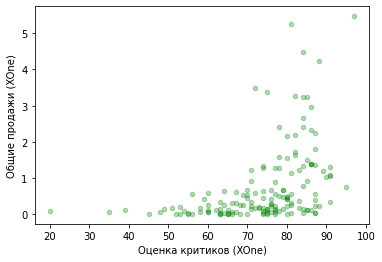

Коэффициент корреляции равен:


0.42867694370333226

In [26]:
actual_data[actual_data['platform'] == 'XOne'].plot(y='ttl_sales', x='critic_score', kind='scatter', alpha=0.3, color='green');

plt.xlabel('Оценка критиков (XOne)')
plt.ylabel('Общие продажи (XOne)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'XOne']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'XOne']['critic_score'].astype('float64'))

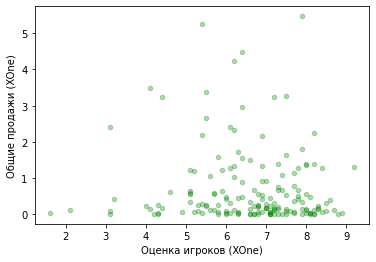

Коэффициент корреляции равен:


-0.0703839280647581

In [27]:
actual_data[actual_data['platform'] == 'XOne'].plot(y='ttl_sales', x='user_score', kind='scatter', alpha=0.3, color='green');
plt.xlabel('Оценка игроков (XOne)')
plt.ylabel('Общие продажи (XOne)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'XOne']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'XOne']['user_score'])

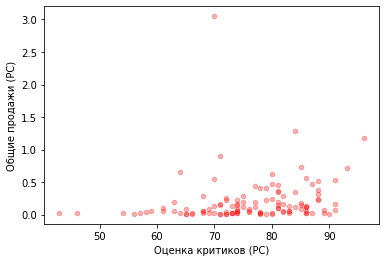

Коэффициент корреляции равен:


0.17463413769350036

In [28]:
actual_data[actual_data['platform'] == 'PC'].plot(y='ttl_sales', x='critic_score', kind='scatter', alpha=0.3, color='red');

plt.xlabel('Оценка критиков (PC)')
plt.ylabel('Общие продажи (PC)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'PC']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'PC']['critic_score'].astype('float64'))

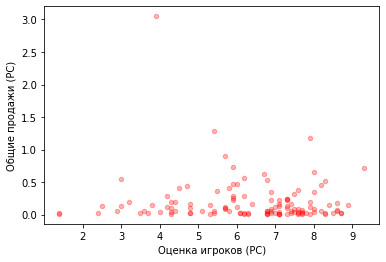

Коэффициент корреляции равен:


-0.07159665703472452

In [29]:
actual_data[actual_data['platform'] == 'PC'].plot(y='ttl_sales', x='user_score', kind='scatter', alpha=0.3, color='red');
plt.xlabel('Оценка игроков (PC)')
plt.ylabel('Общие продажи (PC)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'PC']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'PC']['user_score'])

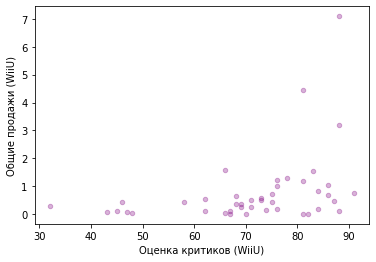

Коэффициент корреляции равен:


0.370201412480884

In [30]:
actual_data[actual_data['platform'] == 'WiiU'].plot(y='ttl_sales', x='critic_score', kind='scatter', alpha=0.3, color='purple');

plt.xlabel('Оценка критиков (WiiU)')
plt.ylabel('Общие продажи (WiiU)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'WiiU']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'WiiU']['critic_score'].astype('float64'))

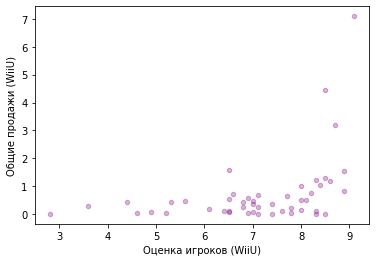

Коэффициент корреляции равен:


0.4079264579217078

In [31]:
actual_data[actual_data['platform'] == 'WiiU'].plot(y='ttl_sales', x='user_score', kind='scatter', alpha=0.3, color='purple');

plt.xlabel('Оценка игроков (WiiU)')
plt.ylabel('Общие продажи (WiiU)')
plt.show()
print('Коэффициент корреляции равен:')
actual_data[actual_data['platform'] == 'WiiU']['ttl_sales'].corr(actual_data[actual_data['platform'] == 'WiiU']['user_score'])

Судя по всему владельцы ПК менее охотно прислушиваются к критикам, чем владельцы консолей PS4 и Xbox One.   
А вот проекты, выходящие на WiiU, показывают, что популярные игры часто заслуживают высоких оценок. 

#### Влияние жанра на прибыль

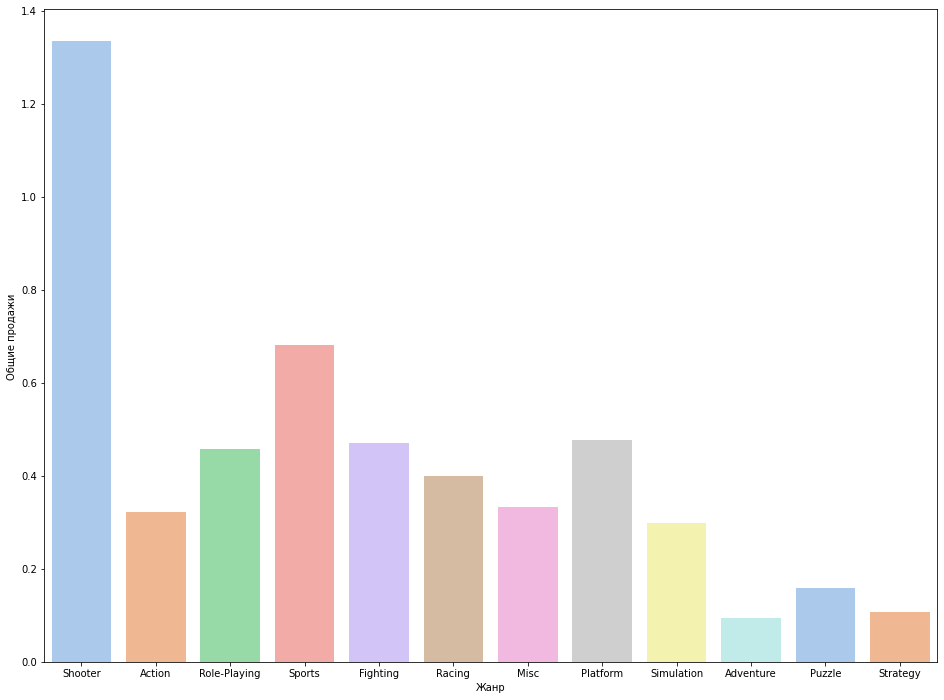

In [32]:
fig, ax = plt.subplots(figsize=(16, 12)) 
sb.barplot(data=actual_data, x='genre', y='ttl_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Жанр', ylabel='Общие продажи') 
plt.show()

Графики показывают, что шутеры самый прибыльный жанр.

На втором месте располагаются спортивные симуляторы, их прибыльность легко объяснить конвейерностью: люди, покупающие эти игры, будут делать это из года в год, неважно насколько сильно преобразовываются эти игры.

Самыми же неприбыльными жанрами являются приключения, стратегии и головоломки. Такую неприбыльность можно легко объяснить обычной непопулярностью (головоломки и приключения скорее пережитки прошлого) либо же нишевостью (стратегии не самый популярный жанр, да ещё и не на всех платформах его можно в полной мере реализовать).

### Портрет пользователя каждого региона

#### Северная Америка

##### Популярность платформы

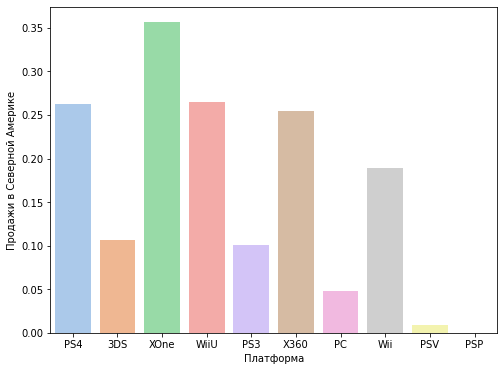

In [33]:
fig, ax = plt.subplots(figsize=(8, 6)) # установим размер графика через subplot
sb.barplot(data=actual_data, x='platform', y='na_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Платформа', ylabel='Продажи в Северной Америке') # имена для осей
plt.show()

In [34]:
actual_data.groupby('platform')['na_sales'].mean().sort_values(ascending=False)

platform
XOne    0.356447
WiiU    0.265205
PS4     0.262261
X360    0.254955
Wii     0.189091
3DS     0.106792
PS3     0.100685
PC      0.047881
PSV     0.008885
PSP     0.000000
Name: na_sales, dtype: float64

Топ-5 платформ в этом регионе:    
1. Xbox One
2. WiiU
3. PS 4
4. Xbox 360
5. Wii

Xbox One уверенно держит первое место по продажам (причина по которой Xbox так популярен в Америке кроется в том, что это американская компания, а значит она имеет больше возможностей для рекламы, да и патриотичную поддержку собственного продукта среди пользователей никто не отменял), когда как следующие три платформы (WiiU, PS4 и Xbox 360) расположились на очень близком расстоянии друг от друга. Пятёрку списка замыкает Wii.

##### Самые популярные жанры

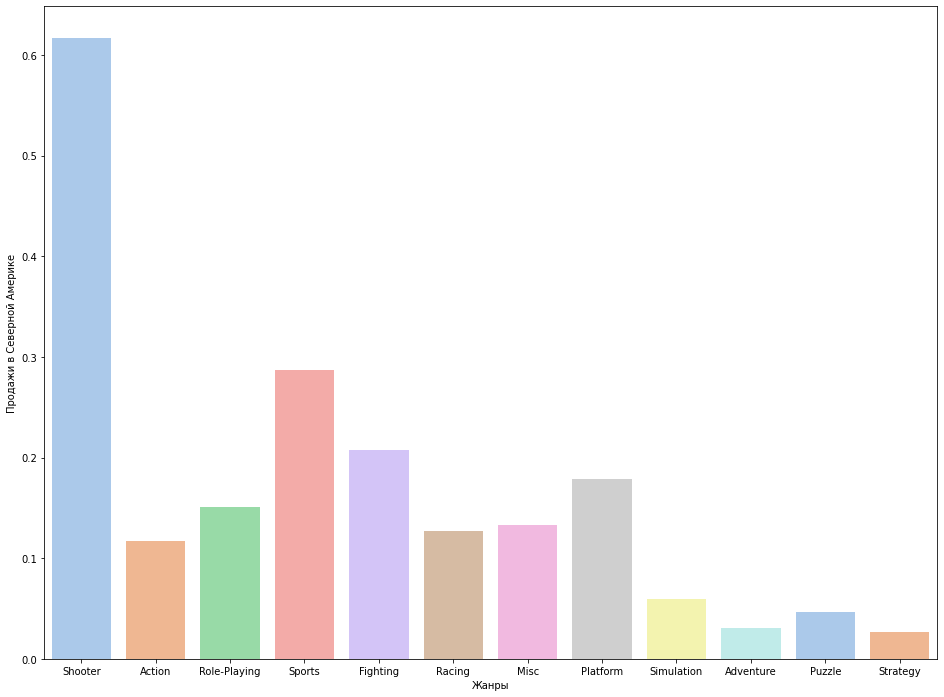

In [35]:
fig, ax = plt.subplots(figsize=(16, 12)) 
sb.barplot(data=actual_data, x='genre', y='na_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Жанры', ylabel='Продажи в Северной Америке') 
plt.show()

Топ-5 жанров в этом регионе:    
1. Шутер
2. Спортивный симулятор
3. Файтинг
4. Платформер
5. РПГ

Высоко на первом месте закрепились игры в жанре шутер, это было логично, исходя из графиков по общемировым продажам.    

На втором месте находятся спортивные симуляторы, это очень похоже на североамериканский регион, так как там полно людей, обожающих "американские" виды спорта: бейсбол, американский футбол, гольф и хоккей, чем игровые разработчики и пользуются.

Три замыкающих позиции несильно оторвались от менее популярных жанров, поэтому искать региональные закономерности здесь не очень корректно.

##### Влияние рейтинга ESRB на продажи

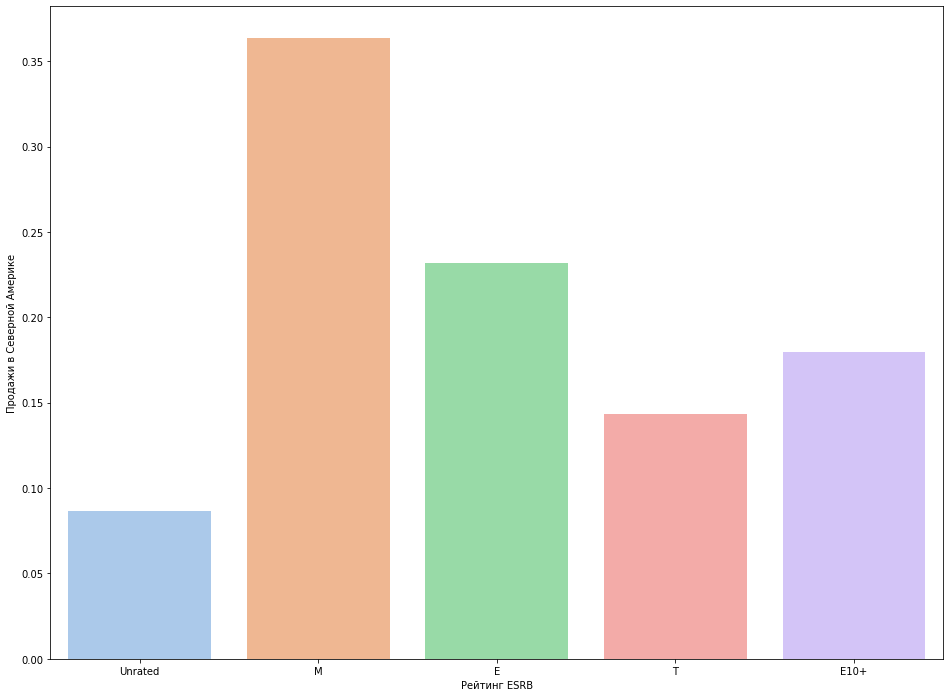

In [36]:
fig, ax = plt.subplots(figsize=(16, 12))
sb.barplot(data=actual_data, x='rating', y='na_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Рейтинг ESRB', ylabel='Продажи в Северной Америке')
plt.show()

In [37]:
actual_data.groupby('rating')['na_sales'].count().sort_values(ascending=False) # Количество игр с определенным рейтингом

rating
Unrated    749
T          272
M          265
E          219
E10+       185
Name: na_sales, dtype: int64

Похоже, что рейтинг действительно влияет на продажи, это может быть из-за того, что игры с жанром M (то есть 17+) предназначены для взрослых людей, которые могут позволить себе покупку дорогостоящих игр, чем и пользуются издатели.

#### Европа

##### Популярность платформы

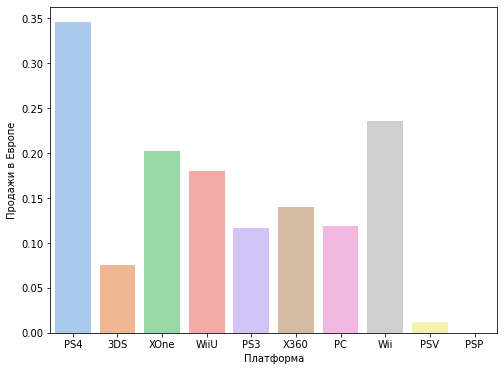

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(data=actual_data, x='platform', y='eu_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Платформа', ylabel='Продажи в Европе')
plt.show()

В топ-5 европейского региона попали те же платформы, что в североамериканском, отличаются только места в рейтинге.    

Топ-5 платформ в этом регионе:    
1. PS 4
2. Wii
3. Xbox One
4. WiiU
5. Xbox 360

Похоже, что европейцы предпочитают японские консоли, оно и логично. Playstation и Nintendo (в этом случае Wii и WiiU) часто покупают из-за их эксклюзивов, у Xbox'а же этих эксклюзивов значительно меньше, да и те скорее всего выходят и на PC.    


##### Самые популярные жанры

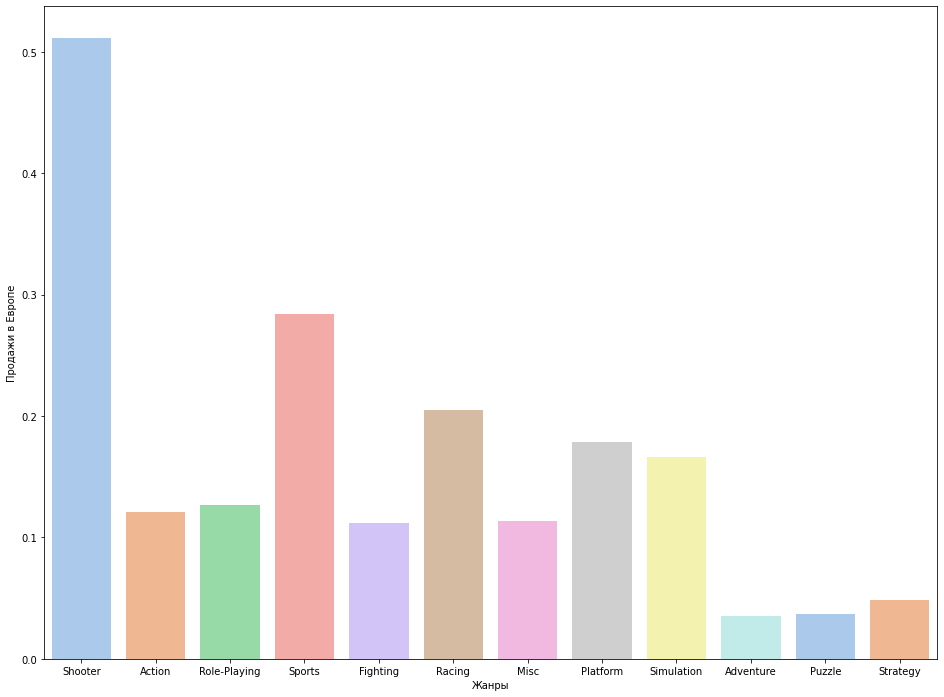

In [39]:
fig, ax = plt.subplots(figsize=(16, 12)) 
sb.barplot(data=actual_data, x='genre', y='eu_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Жанры', ylabel='Продажи в Европе') 
plt.show()

Топ-5 жанров в этом регионе:    
1. Шутер
2. Спортивный симулятор
3. Гонки
4. Платформер
5. Симулятор

Шутеры и здесь занимают первую строчку, такая же ситуация и со спортивными симуляторами (FIFA имеет большой охват игроков в европейском регионе).     

Третье место с гонками можно объяснить культурными и национальными особенностями. В Европе популярен гоночный спорт и, что более важно, он интересней (как минимум для игроков, желающий прочувствовать все эмоции водителя) своими трассами, чем сильно отличается от американского NASCAR, на котором росло американское поколение любителей гонок.

##### Влияние рейтинга ESRB на продажи

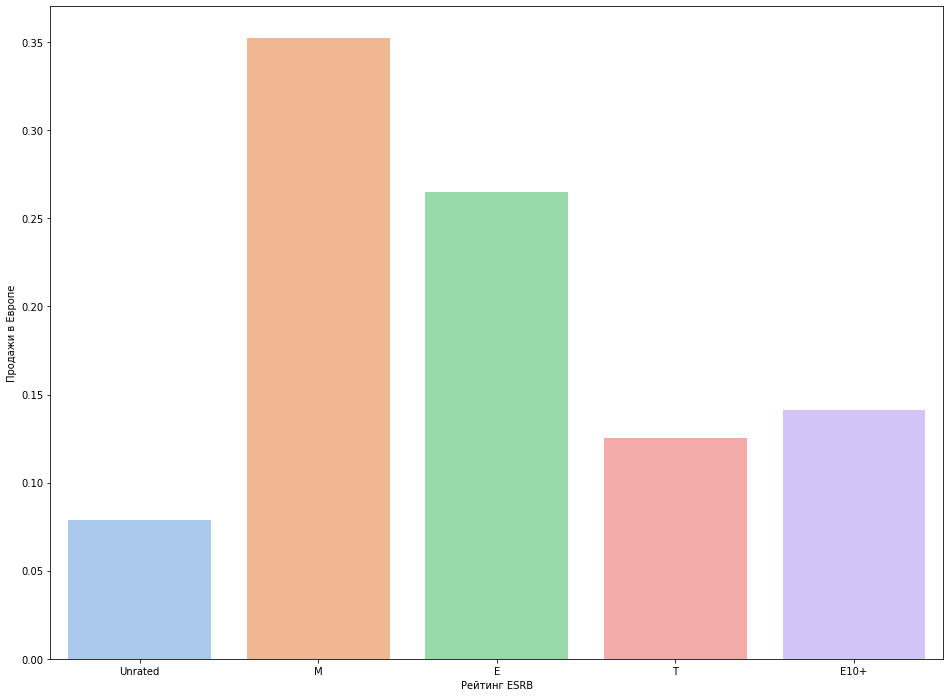

In [40]:
fig, ax = plt.subplots(figsize=(16, 12))
sb.barplot(data=actual_data, x='rating', y='eu_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Рейтинг ESRB', ylabel='Продажи в Европе')
plt.show()

Аналогично североамериканскому региону.

#### Япония

##### Популярность платформы

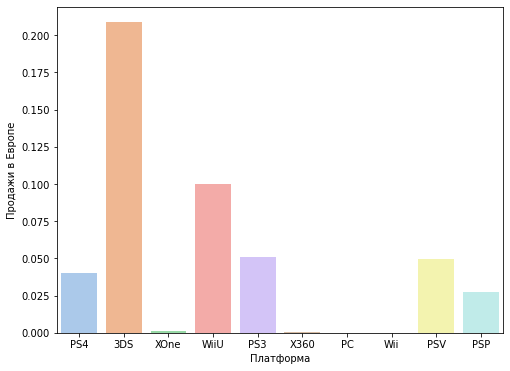

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
sb.barplot(data=actual_data, x='platform', y='jp_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Платформа', ylabel='Продажи в Европе')
plt.show()

Топ-5 платформ в этом регионе:    
1. 3DS
2. WiiU
3. PS 3
4. PSV
5. PS 4

Ситуация в Японии кардинально отличается от всего остального мира. Японцы предпочитают карманные приставки домашним.    
Всё это объясняется культурными особенностями, в Японии раньше (да и сейчас) были очень популярны аркадные автоматы, из-за чего японцам не нужно было покупать консоли и проводить дома всё своё играющее время. Стоимость жилой площади достаточно дорогая, а размеры квартир обычно очень маленькие, из-за чего у людей не всегда было/есть место для домашних приставок. Также можно вспомнить как много японцы проводят времени в общественном транспорте, что является поводом скоротать час-другой за новой игрой о водопроводчике Марио.

##### Самые популярные жанры

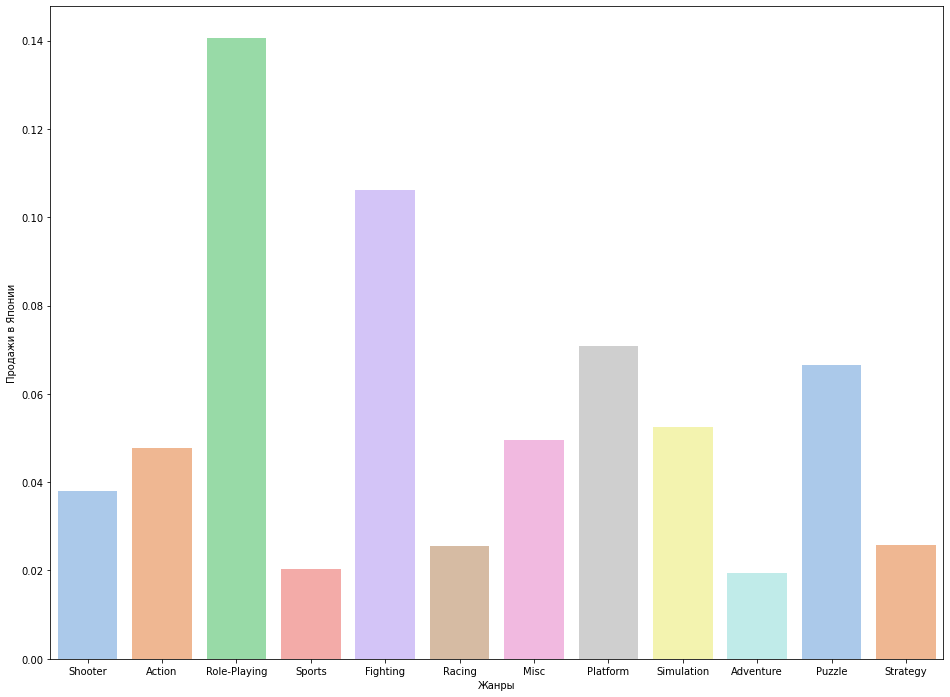

In [42]:
fig, ax = plt.subplots(figsize=(16, 12)) 
sb.barplot(data=actual_data, x='genre', y='jp_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Жанры', ylabel='Продажи в Японии') 
plt.show()

Топ-5 жанров в этом регионе:    
1. РПГ
2. Файтинг
3. Платформер
4. Головоломки
5. Симулятор

Японцы снова удивляют. Шутеры, которые так популярны во всём мире, оказались далеко от топ-5.    
Первое место занимают РПГ, даже скорее JRPG (Japanese Role-Playing Game), которые так популярны в этой стране, объяснить такую популярность можно только национальными особенностями (как и почти всё, что связано с Японией). Второе место напоминает нам об эпохе аркадных автоматов. Платформеры так популярны благодаря Nintendo и их играм о Марио.

##### Влияние рейтинга ESRB на продажи

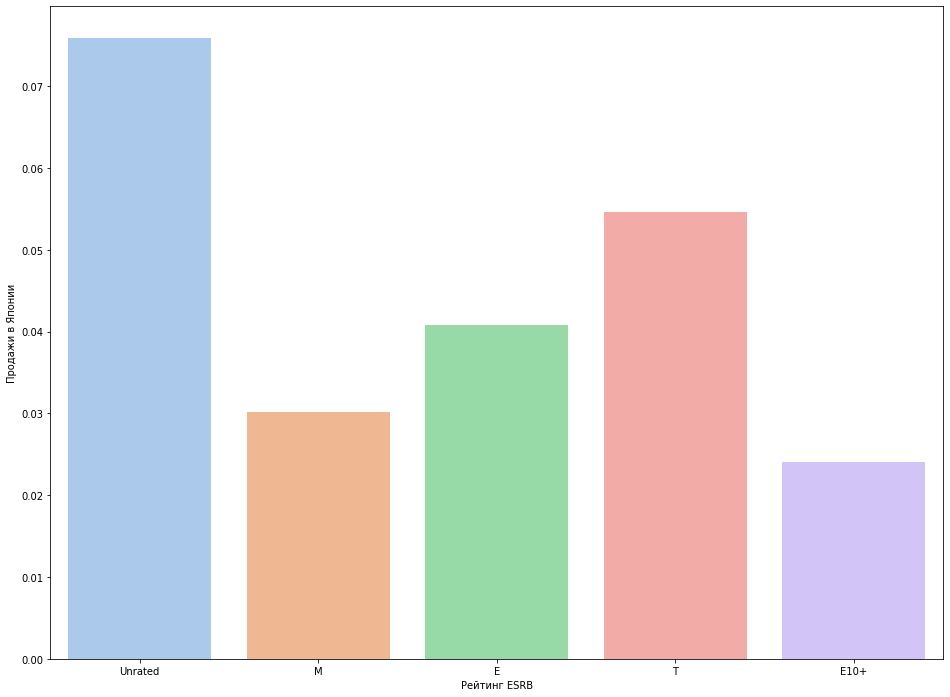

In [43]:
fig, ax = plt.subplots(figsize=(16, 12))
sb.barplot(data=actual_data, x='rating', y='jp_sales', palette='pastel', ci=None, ax=ax);
ax.set(xlabel='Рейтинг ESRB', ylabel='Продажи в Японии')
plt.show()

И здесь японцы решили отличиться.    
Первое место по продажам занимают продукты без рейтинга, чего не было замечено в предыдущих регионах, связано это с тем, что в Японии существует свой возрастной рейтинг, выставляемый компанией CERO.     
Если же рассматривать только игры с указанным рейтингом, то мы увидим, что первое место занимают игры для подростков, а второе и вовсе для всех возрастов, игры для взрослой аудитории расположились на третьем месте.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы.    

H₀: "Средние пользовательские рейтинги платформ Xbox One и PC равны".      
H₁: "Средние пользовательские рейтинги платформ Xbox One и PC не равны".

Теперь займёмся расчётами.

In [44]:
alpha = .05
# Выбросим значения NaN из-за того, что невозможно провести t-test 
results_h1 = st.ttest_ind(actual_data[actual_data.platform == 'XOne']['user_score'].dropna(),
                          actual_data[actual_data.platform == 'PC']['user_score'].dropna(),
                          equal_var=False)

print('p-значение:', results_h1.pvalue)

if results_h1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Исходя из значений p-value принимаем нулевую гипотезу.    

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы.    

H₀: "Средние пользовательские рейтинги жанров Action и Sports разные".      
H₁: "Средние пользовательские рейтинги жанров Action и Sports равны".

In [45]:
alpha = .05
results_h1 = st.ttest_ind(actual_data[actual_data.genre == 'Action']['user_score'].dropna(),
                          actual_data[actual_data.genre == 'Sports']['user_score'].dropna(),
                          equal_var=False)

print('p-значение:', results_h1.pvalue)

if results_h1.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 1.1825550382644557e-14
Не получилось отвергнуть нулевую гипотезу


Исходя из значений p-value принимаем нулевую гипотезу.    

Как в первом, так и во втором случае был использован двухвыборочный t-критерий для независимых выборок. Сделано это было потому, что: 
* каждая из выборок является массивом, а не числом;
* обе выборки независимы друг друга (если бы мы, к примеру, выясняли равны ли средние пользовательские рейтинги жанров Action в 2014 и 2015 годах, то тогда можно было бы говорить о наличии зависимости в выборках, но здесь другой случай).     

И именно `st.ttest_ind` идеально подходит для этой задачи (мы предположили, что дисперсии выборок различаются, так как размеры массивов не равны друг другу).

### Общий вывод

В самом начале мы отредактировали датафрейм и привели его к нашим стандартам:    
* были исправлены названия столбцов;
* были заполнены некоторые пропуски;
* были удалены некоторые строки, мешающие объективности данных; 
* были преобразованы типы данных.

Проведя анализ данных, было выявлено, что примерная продолжительность "жизни" платформы равна 5-10 лет, поэтому актуальным периодом для прогноза на 2017 год мы назвали последние 3 года (2014-2016), как половина "жизни" платформы.    
После этого все расчёты велись, основываясь на данных именно за этот промежуток времени. 

На базе полученных данных можно сделать некоторые выводы:  

        - топ-3 по общим продажам занимают: PS4, XOne и WiiU. Среди всех платформ выделяется 3DS, которая единственная показала рост в 2016 году относительно 2015 года, так что можно причислить эту платформу к потенциально прибыльным (как и плафтормы указанные до этого);
        - на Wii, PS4 и Xbox One проект может принести как большое количество продаж, так и малое, когда как на PС и PSV игры не так сильно "выстреливают";
        - владельцы ПК менее охотно прислушиваются к критикам, чем владельцы консолей PS4 и Xbox One;
        - проекты, выходящие на WiiU, показывают, что популярные игры часто заслуживают высоких оценок (когда как на PS4 и XOne таких зависимостей не наблюдается).

Также для каждого из представленных регионов был построен портрет самого прибыльного пользователя.

Северная Америка:    
Взрослый человек, играющий в игры жанра шутер на консоли Xbox One.    

Европа:     
Взрослый человек, играющий в игры жанра шутер на консоли Playstation 4.

Япония:    
Подросток, играющий в игры жанра RPG на консоли 3DS.

Были проверены 2 гипотезы.    
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.   

Обе гипотезы подтвердились

Говоря о прогнозе на 2017 год и получению потенциальной прибыли, наш совет такой:     
Если Вы ставите приоритет на общемировой либо же европейский/североамериканский рынок, то лучшим решением будет продажа шутеров с рейтингом M на консолях PS4 и Xbox One.     
Если же Вы ставите приоритет на японский сегмент рынка, то тогда Вам стоит присмотреться к играм жанров RPG, файтинг и головоломки на портативные приставки (в особенности 3DS).